In [158]:
import numpy as np, matplotlib.pyplot as plt
import pandas as pd
import requests
import time
import json
from bs4 import BeautifulSoup
import sys
from scipy import stats
from sklearn.cross_validation import *

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [159]:
master = pd.read_csv('data/lahman/Master.csv')
all_batting = pd.read_csv('data/lahman/Batting.csv')
pitching = pd.read_csv('data/lahman/Pitching.csv')
smalldf = pd.read_csv('data/small.csv')

In [160]:
smalldf.head()

,bID,pID,AB,H,PA,RL,SAC,SO,TB,W,matchID,AVG,OBP,ov_AB,ov_H,ov_PA,ov_SAC,ov_SO,ov_TB,ov_W,ov_AVG,ov_OBP,ov_FACED,ov_SO_PCT,ov_W_PCT,ov_H_PCT,ovp_AB,ovp_H,ovp_PA,ovp_SAC,ovp_SO,ovp_TB,ovp_W,ovp_AVG,ovp_OBP,ovp_FACED,ovp_SO_PCT,ovp_W_PCT,ovp_H_PCT
0,schic002,benea001,9,0,9,R,1,4,0,0,schic002_benea001,0.000000,0.000000,146,22,150,14,57,30,4,0.150685,0.173333,14,0.38,0.026667,0.146667,3046,827,3425,46,609,1713,379,0.271504,0.352117,136,0.177810,0.110657,0.241460
1,schic002,browk001,11,1,11,R,0,6,1,0,schic002_browk001,0.090909,0.090909,146,22,150,14,57,30,4,0.150685,0.173333,14,0.38,0.026667,0.146667,4582,1159,4989,47,892,1974,407,0.252946,0.313891,222,0.178793,0.081579,0.232311
2,schic002,fassj001,11,2,11,L,1,5,4,0,schic002_fassj001,0.181818,0.181818,146,22,150,14,57,30,4,0.150685,0.173333,14,0.38,0.026667,0.146667,3006,847,3357,40,582,1587,351,0.281770,0.356866,185,0.173369,0.104558,0.252309
3,schic002,glavt001,14,3,14,L,1,3,5,0,schic002_glavt001,0.214286,0.214286,146,22,150,14,57,30,4,0.150685,0.173333,14,0.38,0.026667,0.146667,7561,2115,8413,102,985,3852,852,0.279725,0.352668,280,0.117081,0.101272,0.251397
4,schic002,hampm001,16,2,16,L,1,6,2,0,schic002_hampm001,0.125000,0.125000,146,22,150,14,57,30,4,0.150685,0.173333,14,0.38,0.026667,0.146667,4782,1361,5339,53,666,2355,557,0.284609,0.359243,232,0.124742,0.104327,0.254917


In [161]:
master[master.playerID=='fishech01']

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
5247,fishech01,1844,11,NaN,USA,PA,Philadelphia,1912,9,26,USA,NY,New York,Cherokee,Fisher,William Charles,164,69,R,R,1871-05-06,1878-07-09,fishc102,fishech01


In [162]:
pitching.tail()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
43325,yateski01,2014,1,TBA,AL,0,2,37,0,0,0,1,108,33,15,4,15,42,0.241,3.75,3,2,3,0,156,12,16,0,1,2
43326,youngch03,2014,1,SEA,AL,12,9,30,29,0,0,0,495,143,67,26,60,108,0.234,3.65,3,5,3,1,688,0,70,4,9,6
43327,zeidjo01,2014,1,HOU,AL,0,0,23,0,0,0,0,62,30,16,6,7,18,0.345,6.97,1,1,1,0,98,6,18,1,2,1
43328,zieglbr01,2014,1,ARI,NL,5,3,68,0,0,0,1,201,60,26,5,24,54,0.243,3.49,6,0,3,0,281,11,29,2,4,9
43329,zimmejo02,2014,1,WAS,NL,14,5,32,32,3,2,0,599,185,59,13,29,182,0.244,2.66,0,4,6,0,800,0,67,5,3,11


In [163]:
retro_to_lah = dict(zip(master['retroID'], master['playerID'])) #key: retroID, value lahmanID
lah_to_retro = dict(zip(master['playerID'], master['retroID']))

In [164]:

pitcherIDs = smalldf['pID'].unique()#RetroIDs
L_pitcherIDs = [retro_to_lah[name] for name in pitcherIDs] #LahmanIDs



In [165]:
grouped =  pitching.groupby('playerID').sum().reset_index()
mask = np.in1d(grouped.playerID, L_pitcherIDs)
pitcher_sums = grouped[mask]

In [166]:
pitcher_sums[pitcher_sums.playerID=='zimmejo02']

,playerID,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
8947,zimmejo02,12069,6,57,40,145,145,8,4,0,2677,843,321,80,182,739,1.512,21.6,5,13,34,1,3658,0,350,36,17,11


In [167]:
pitcher_sums.columns

Index([u'playerID', u'yearID', u'stint', u'W', u'L', u'G', u'GS', u'CG', u'SHO', u'SV', u'IPouts', u'H', u'ER', u'HR', u'BB', u'SO', u'BAOpp', u'ERA', u'IBB', u'WP', u'HBP', u'BK', u'BFP', u'GF', u'R', u'SH', u'SF', u'GIDP'], dtype='object')

For details on the Lahman file columns, see "2.3: Pitching Table": http://seanlahman.com/files/database/readme2014.txt

pitcher_sums is just the "sums", so be sure to recalculate things like ERA and BAOpp that don't add linearly

In [168]:
pitcher_sums['ERA2'] = 9.*(pitcher_sums.ER)/(pitcher_sums.IPouts / 3.)
pitcher_sums['BAOpp2'] = (pitcher_sums.H + pitcher_sums.BB + pitcher_sums.IBB + pitcher_sums.HBP) / pitcher_sums.BFP
pitcher_sums['WiP'] = pitcher_sums.W/pitcher_sums.G #win percentage
pitcher_sums['IP'] = pitcher_sums.IPouts/3.



/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveat

In [169]:
ccols=pitcher_sums.columns[3:]

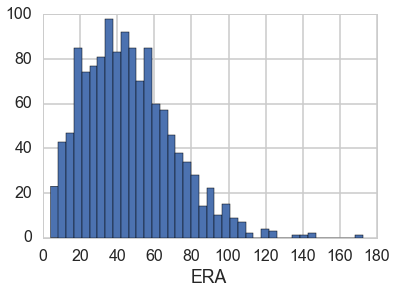

In [170]:
plt.hist(pitcher_sums.ERA, bins=40)
plt.xlabel('ERA')

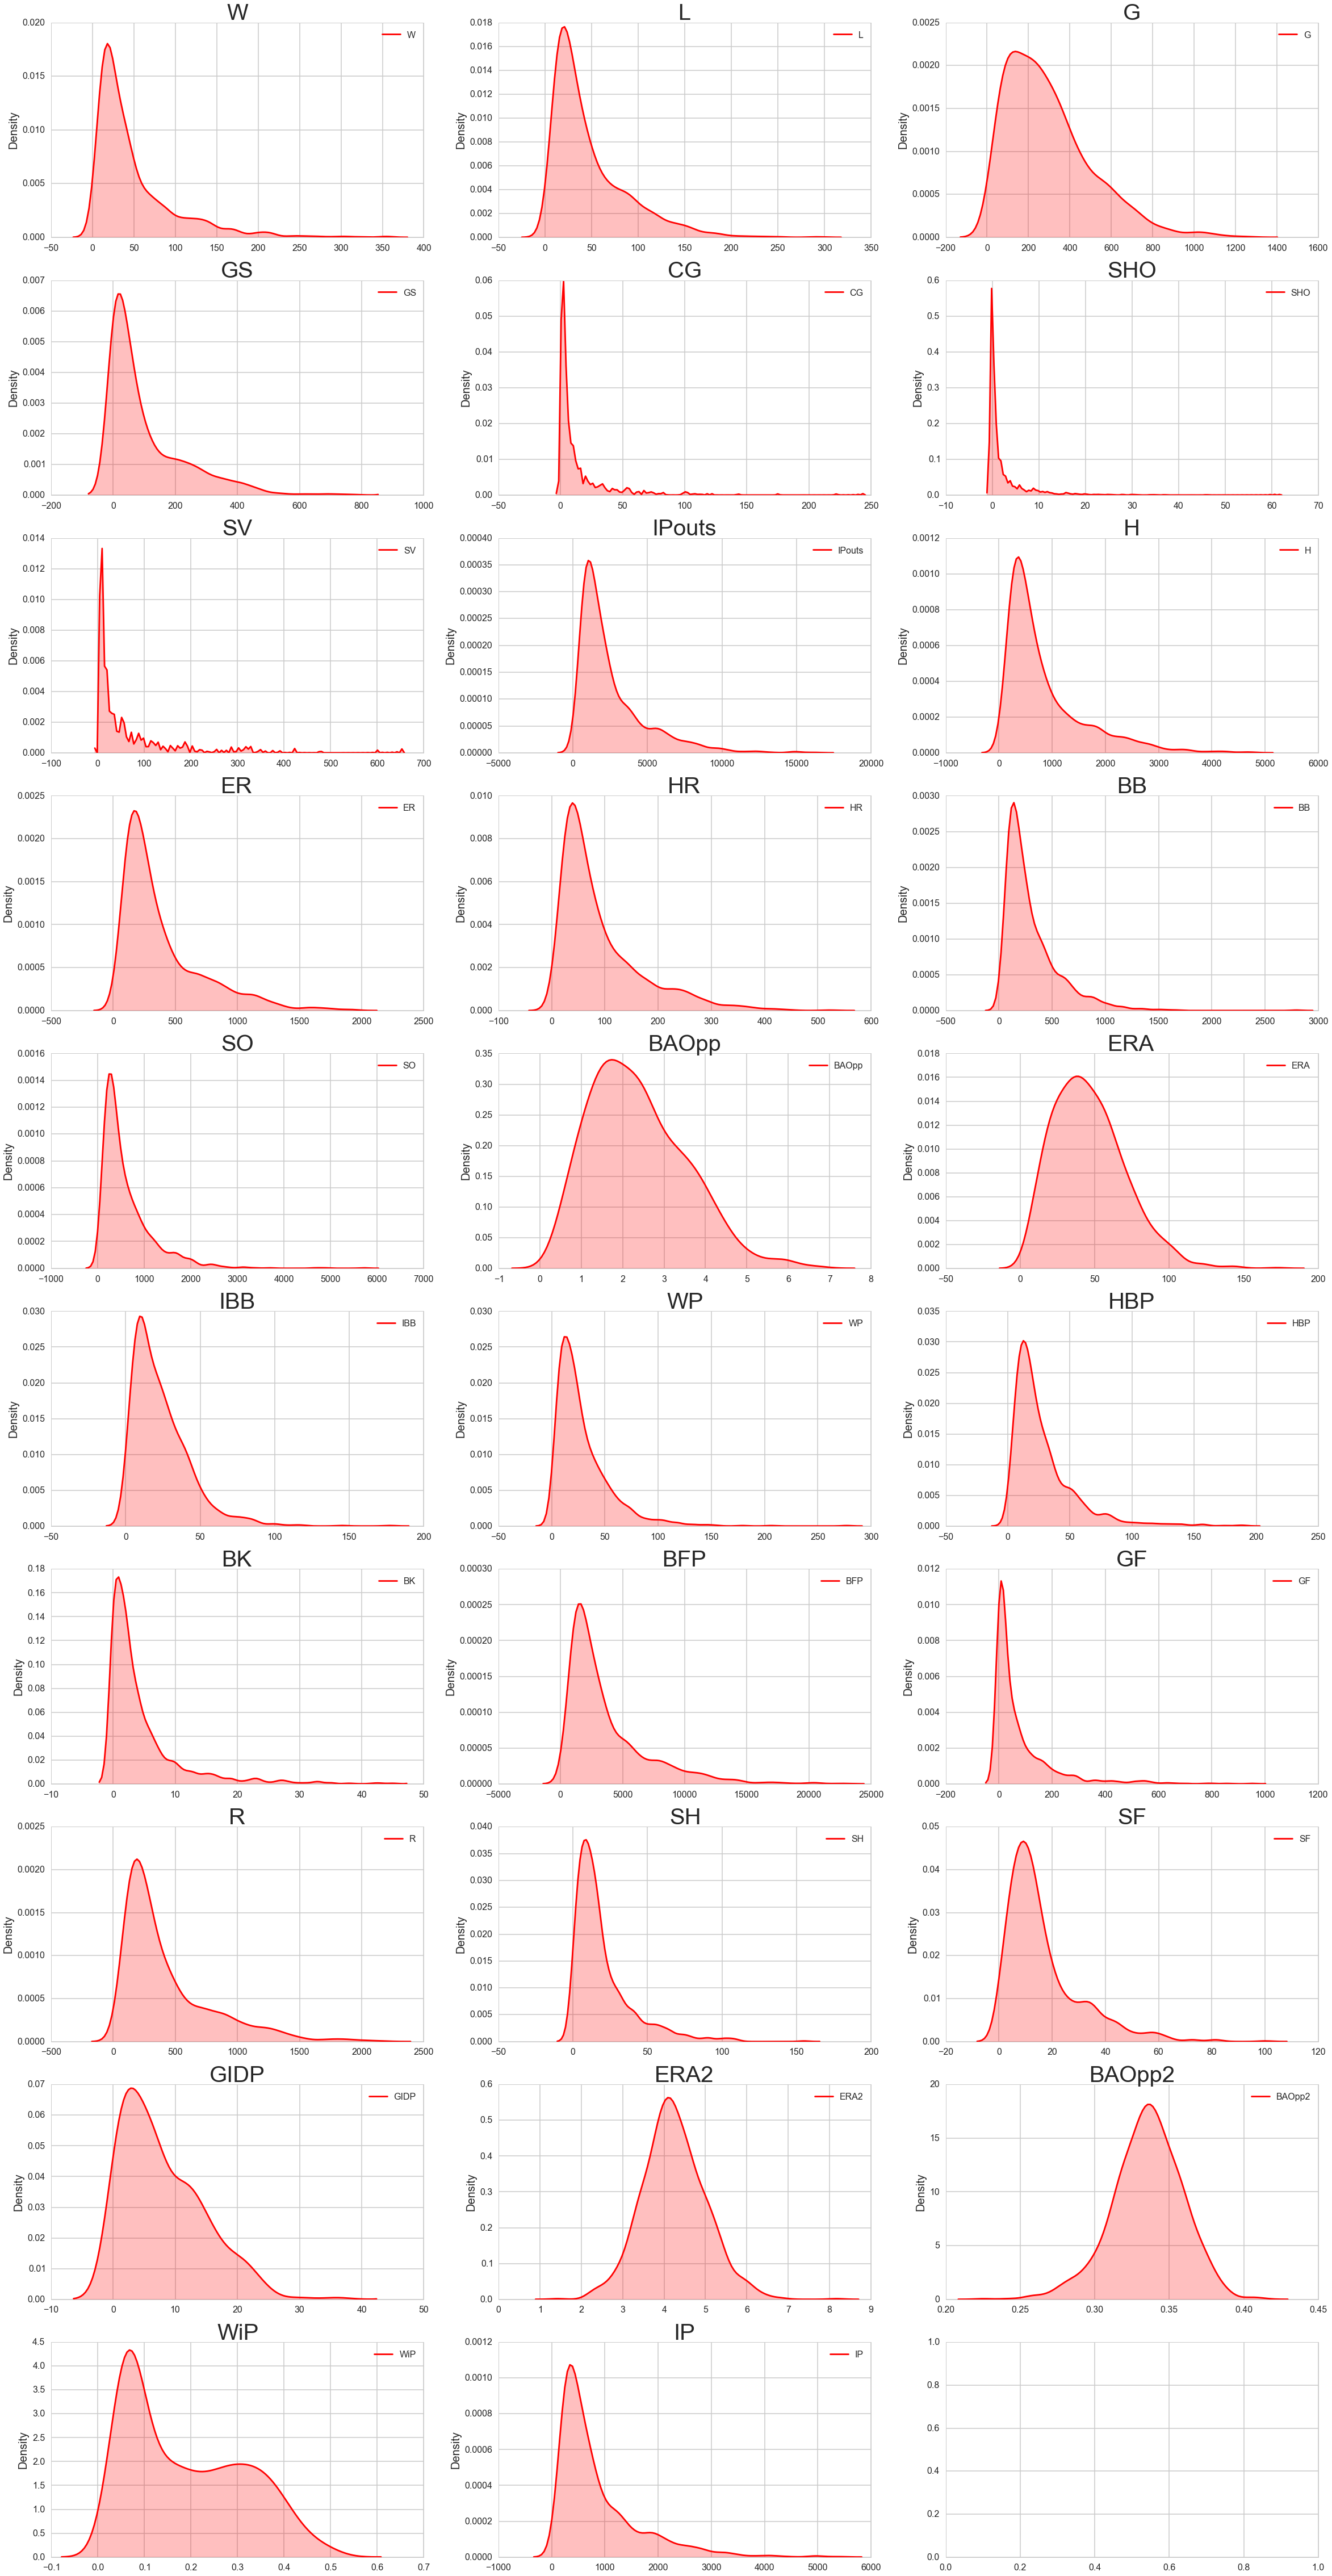

In [171]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(40,80))
# loop through figures and columns
for ax, c in zip(axes.ravel(), ccols):
    positive = pitcher_sums
    #generating the two separated density plots
    sns.kdeplot(positive[c], shade = True, ax=ax, color='r')
    ax.set_title(c, fontsize=40)
    ax.set_ylabel("Density",fontsize=20)
    #ax.set_xlabel("Feature Response",fontsize=20)
    ax.legend()

In [172]:
pitcher_sums.head()

,playerID,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,ERA2,BAOpp2,WiP,IP
0,aardsda01,16069,8,15,17,298,0,0,0,69,919,271,144,35,169,305,2.093,42.05,19,11,15,1,1346,132,152,17,10,NaN,4.230686,0.352155,0.050336,306.333333
7,abbotji01,21932,12,87,108,263,254,31,6,0,5022,1779,791,154,620,888,2.370,49.46,30,53,32,11,7211,5,880,NaN,NaN,NaN,4.252688,0.341284,0.330798,1674.000000
9,abbotpa01,23977,13,43,37,162,112,1,0,0,2162,682,394,101,393,496,2.677,66.14,17,37,21,0,3187,17,421,8,12,NaN,4.920444,0.349231,0.265432,720.666667
20,accarje01,20086,12,10,20,262,0,0,0,38,854,288,136,24,111,205,3.004,53.49,16,10,9,2,1222,115,143,5,13,NaN,4.299766,0.346972,0.038168,284.666667
21,aceveal01,14077,7,31,16,204,15,0,0,29,1141,333,162,48,129,282,1.689,28.29,6,5,28,6,1599,91,172,6,13,1,3.833479,0.310194,0.151961,380.333333


In [173]:
p1=pitcher_sums[pitcher_sums.playerID=='aardsda01']
p2=pitcher_sums[pitcher_sums.playerID=='abbotji01']

In [174]:
def pitcher_sim(p1_matchups, p2_matchups, n_common):
    score=1000

    win_diff=np.abs(p1['W']-p2['W']) #1 pt for each win
    loss_diff=np.abs(p1['L']-p2['L'])/2. #1 pt each 2 losses
    wip_diff=np.abs(p1['WiP']-p2['WiP'])/.002 #1 pt diff of winning percentage of 0.002 
    if wip_diff >100: #max= 100
        wip_diff=100 
    era2_diff=np.abs(p1['ERA2']-p2['ERA2'])/0.02 #1 pt diff of ERA of 0.02
    if era2_diff >100:
        era2_diff=100 #max =100
    gp_diff=np.abs(p1['G']-p2['G'])/10. #1 pt for diff of 10 games played
    st_diff=np.abs(p1['GS']-p2['GS'])/20. #1 pt for diff of 20 games started
    cg_diff=np.abs(p1['CG']-p2['CG'])/20. #1 pt for diff of 20 games completed
    ip_diff=np.abs(p1['IP']-p2['IP'])/50. #1 pt for diff of 50 innings pitched
    h_diff=np.abs(p1['H']-p2['H'])/50. #1 pt for diff of 50 hits allowed
    sp_diff=np.abs(p1['SO']-p2['SO'])/30. #1 pt for diff of 30 strikeouts
    bb_diff=np.abs(p1['BB']-p2['BB'])/50. #1 pt for diff of 10 walks
    sho_diff=np.abs(p1['SHO']-p2['SHO'])/5. #1 pt for diff of 5 shutouts
    sv_diff=np.abs(p1['SV']-p2['SV'])/3. #1 pt for diff of 3 saves
    final_score=score-win_diff-loss_diff-wip_diff-era2_diff-go_diff-st_diff-cg_diff-ip_diff-h_diff-sp_diff-bb_diff-sho_diff-sv_diff  
    if np.isnan(final_score):
        return 0
    else: 
        return final_score
    

In [199]:
print "Number of Matchups",smalldf.shape[0]
print "Number of Batters", smalldf.bID.unique().shape[0]
print "Number of Pitchers", smalldf.pID.unique().shape[0]
s,d=compute_supports(smalldf)

Number of Matchups 109688
Number of Batters 910
Number of Pitchers 1297
mean support 13.6844248836 median support 5.0


In [200]:
print smalldf.shape,
smalldf[smalldf.ov_FACED > 100].shape

(109688, 39)

(88234, 39)

In [177]:
ybar = traindf.H.sum() / float(traindf.AB.sum())
ybar

0.27416061815449727

In [178]:
ubids=traindf.bID.unique()#unique-user-ids
upids=traindf.pID.unique()#unique-item-ids
print ubids,upids,len(upids),len(ubids)

['aberb001' 'abreb001' 'abrej003' 'ackld001' 'adamm002' 'adamr002'
 'alexm001' 'alfoe001' 'allec001' 'alomr001' 'aloms001' 'alony001'
 'aloum001' 'altuj001' 'alvap001' 'amara001' 'ameza001' 'andeb003'
 'andeg001' 'andem003' 'andir001' 'andre001' 'ankir001' 'aokin001'
 'arcio001' 'arenj001' 'arenn001' 'ariaj001' 'aschc001' 'ashba002'
 'atkig001' 'aurir001' 'ausmb001' 'avila001' 'avilm001' 'aybae001'
 'aybaw001' 'baerc001' 'bagwj001' 'bakej001' 'bakej002' 'bakop001'
 'baldr001' 'barar001' 'bardj001' 'barfj003' 'barmc001' 'barnb002'
 'barnd001' 'barrm003' 'bartd001' 'bartj001' 'batit001' 'bautd001'
 'bautj002' 'bay-j001' 'beckg001' 'belld002' 'bellm002' 'bellr002'
 'belta001' 'beltb001' 'beltc001' 'benng001' 'bergd002' 'bergp001'
 'berkl001' 'bernr001' 'berra001' 'betay001' 'betew001' 'bigbl001'
 'biggc001' 'blacc001' 'blakc001' 'blalh001' 'blang001' 'blanh001'
 'blank002' 'bloow001' 'blumg001' 'boesb001' 'bogax001' 'bogub001'
 'bondb001' 'bonie001' 'boona001' 'boonb002' 'borbj001' 'borcj

In [184]:
ubidmap={v:k for k,v in enumerate(ubids)}#of length U
upidmap={v:k for k,v in enumerate(upids)}#of length M

In [185]:
def compute_supports(df):
    ubids=df.bID.unique()
    pitch = df.groupby('pID').bID.unique()
    bdict={}
    for e,v in zip(pitch.index.values, pitch.values):
        bdict[e] = np.array([item in v for item in ubids])
    pitchers=bdict.keys()
    supports=[]
    for i,p1 in enumerate(pitchers):
        for j,p2 in enumerate(pitchers):
            if  i < j:
                supmask = (bdict[p1] & bdict[p2])
                common_batters = np.sum(supmask)
                supports.append(common_batters)
    print "mean support",np.mean(supports), "median support", np.median(supports)
    return supports, bdict


In [186]:
class Database:
    "A class representing a database of similarities and common supports"
    
    def __init__(self, rindexmap, supports):
        "the constructor, takes a map of restaurant id's to integers"
        database={}
        self.rindexmap=rindexmap
        self.supports=supports
        l_keys=len(self.rindexmap.keys())
        self.database_sim=np.zeros([l_keys,l_keys])
        self.database_sup=np.zeros([l_keys, l_keys], dtype=np.int)

    def set_supports(self, supports):
        self.supports=supports
        
    def get(self, b1, b2):
        "returns a tuple of similarity,common_support given two business ids"
        sim=self.database_sim[self.rindexmap[b1]][self.rindexmap[b2]]
        nsup=self.database_sup[self.rindexmap[b1]][self.rindexmap[b2]]
        return (sim, nsup)

In [195]:
db2=Database(upidmap, supports)

In [196]:
def get_pitcher_matchups(pID, df, set_of_batters):
    """
    given a pitcher id and a set of batters, return the sub-dataframe of their
    averages.
    """
    mask = (df.bID.isin(set_of_batters)) & (df.pID==pID)
    avgs = df[mask]
    avgs = avgs[avgs.bID.duplicated()==False]
    return avgs

In [197]:

def calculate_similarity(db, df, p1, p2, similarity_func):
    # find common batters
    common_batters = db.supports[db.rindexmap[p1]][db.rindexmap[p2]]
    n_common=len(common_batters)
    if p1==p2:
        return 1., n_common
    #get reviews
    p1_ov_AVG = get_pitcher_matchups(p1, df, common_batters)
    p2_ov_AVG = get_pitcher_matchups(p2, df, common_batters)
    sim=similarity_func(p1_ov_AVG, p2_ov_AVG, n_common)
    return sim, n_common

def populate_by_calculating(db, df, similarity_func):
    """
    a populator for every pair of businesses in df. takes similarity_func like
    pearson_sim as argument
    """
    items=db.rindexmap.items()
    for b1, i1 in items:
        for b2, i2 in items:
            if i1 <= i2:
                sim, nsup=calculate_similarity(db, df, b1, b2, similarity_func)
                db.database_sim[i1][i2]=sim
                db.database_sim[i2][i1]=sim
                db.database_sup[i1][i2]=nsup
                db.database_sup[i2][i1]=nsup

In [198]:
%%time
populate_by_calculating(db2, traindf, pitcher_sim)

IndexError: list index out of range

In [136]:
traindf.head()

,bID,pID,AB,H,PA,RL,SAC,SO,TB,W,matchID,AVG,OBP,ov_AB,ov_H,ov_PA,ov_SAC,ov_SO,ov_TB,ov_W,ov_AVG,ov_OBP,ov_FACED,ov_SO_PCT,ov_W_PCT,ov_H_PCT,ovp_AB,ovp_H,ovp_PA,ovp_SAC,ovp_SO,ovp_TB,ovp_W,ovp_AVG,ovp_OBP,ovp_FACED,ovp_SO_PCT,ovp_W_PCT,ovp_H_PCT
75888,aberb001,bellr003,9,1,10,R,0,0,1,1,aberb001_bellr003,0.111111,0.200000,359,78,385,4,41,120,26,0.21727,0.27013,30,0.106494,0.067532,0.202597,1513,457,1705,22,219,1037,192,0.302049,0.380645,130,0.128446,0.112610,0.268035
75889,aberb001,buehm001,13,2,14,L,0,3,6,1,aberb001_buehm001,0.153846,0.214286,359,78,385,4,41,120,26,0.21727,0.27013,30,0.106494,0.067532,0.202597,9820,2730,10527,135,1433,5096,707,0.278004,0.326494,445,0.136126,0.067161,0.259333
75890,aberb001,burkj001,8,2,9,R,0,1,2,1,aberb001_burkj001,0.250000,0.333333,359,78,385,4,41,120,26,0.21727,0.27013,30,0.106494,0.067532,0.202597,4252,1236,4640,54,713,2365,388,0.290687,0.350000,228,0.153664,0.083621,0.266379
75891,aberb001,castf001,7,1,11,R,0,0,1,4,aberb001_castf001,0.142857,0.454545,359,78,385,4,41,120,26,0.21727,0.27013,30,0.106494,0.067532,0.202597,2271,645,2516,30,364,1295,245,0.284016,0.353736,153,0.144674,0.097377,0.256359
75892,aberb001,clemr001,25,7,26,R,1,2,9,1,aberb001_clemr001,0.280000,0.307692,359,78,385,4,41,120,26,0.21727,0.27013,30,0.106494,0.067532,0.202597,6671,1612,7402,67,1597,3019,731,0.241643,0.316536,288,0.215752,0.098757,0.217779


In [141]:
tpair=('zieglbr01', 'zimmejo02')
print db2.get(tpair[0],tpair[1])

KeyError: 'zieglbr01'